# Test các tool cho việc extract entity, relation từ text

Ở đây mình thử dùng model [gpt-4o-mini] và framework llama_index để extract entity và relation từ text.

The choice between these extractors depends on the specific use case:

- Use SimpleLLMPathExtractor for exploratory analysis where you want to capture a wide range of potential relationships for RAG applications, without caring about the entity types.
- Use SchemaLLMPathExtractor when you have a well-defined domain and want to ensure consistency in the extracted knowledge.
- Use DynamicLLMPathExtractor when you want a balance between structure and flexibility, allowing the model to discover new entity and relation types while still providing some initial guidance. This one is especially useful if you want a KG with labeled (typed) entities but don't have an input Schema (or you've partially defined the schema as a starting base).


https://docs.llamaindex.ai/en/stable/examples/property_graph/Dynamic_KG_Extraction/

In [10]:
from dotenv import load_dotenv
import os
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core import Settings

# Install the python-dotenv package if not already installed
%pip install python-dotenv

# Load the .env file

load_dotenv('../.env')

# Access the OpenAI key
openai_key = os.getenv("OPENAI_API_KEY")

llm = OpenAI(model="gpt-4o-mini", api_key=openai_key)
embed_model = OpenAIEmbedding(model="text-embedding-3-small")

Settings.llm = llm
Settings.embed_model = embed_model

FOLDER_DATA = "../data/bao-chi"

Note: you may need to restart the kernel to use updated packages.


In [11]:
import nest_asyncio

nest_asyncio.apply()

## Load tài liệu

In [12]:
from llama_index.core import SimpleDirectoryReader
from llama_index.core import PropertyGraphIndex
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.llms.openai import OpenAI

from llama_index.graph_stores.neo4j import Neo4jPropertyGraphStore

documents = SimpleDirectoryReader(FOLDER_DATA).load_data()
print("length of documents:", len(documents))
print('documents:', documents[14])



length of documents: 17
documents: Doc ID: d2688a88-d8f0-40ec-9499-fec9d6d0cf89
Text: Ảnh 12 **Vậy thì trong thời gian tới Techcombank có những chính
sách gì hay những kế hoạch gì để đồng hành với các doanh nghiệp phát
triển một cách bền vững, đặc biệt?**  Tôi nghĩ đó là một câu hỏi rất
quan trọng nhưng cũng là một câu hỏi rất khó, bởi vì đặc biệt đối với
nhiều doanh nghiệp, việc tăng trưởng ESG là một thách thức không hề dễ
dàng...


In [22]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 5.8 MB/s eta 0:00:00


In [24]:
from llama_index.core import Document, PropertyGraphIndex

kg_extractor = SimpleLLMPathExtractor(
    llm=llm, max_paths_per_chunk=20, num_workers=4
)

simple_index = PropertyGraphIndex.from_documents(
    documents,
    llm=llm,
    embed_kg_nodes=False,
    kg_extractors=[kg_extractor],
    show_progress=True,
)

Extracting paths from text: 100%|██████████| 19/19 [00:15<00:00,  1.19it/s]


In [27]:
simple_index.property_graph_store.save_networkx_graph(
    name="./SimpleGraph.html"
)


[]

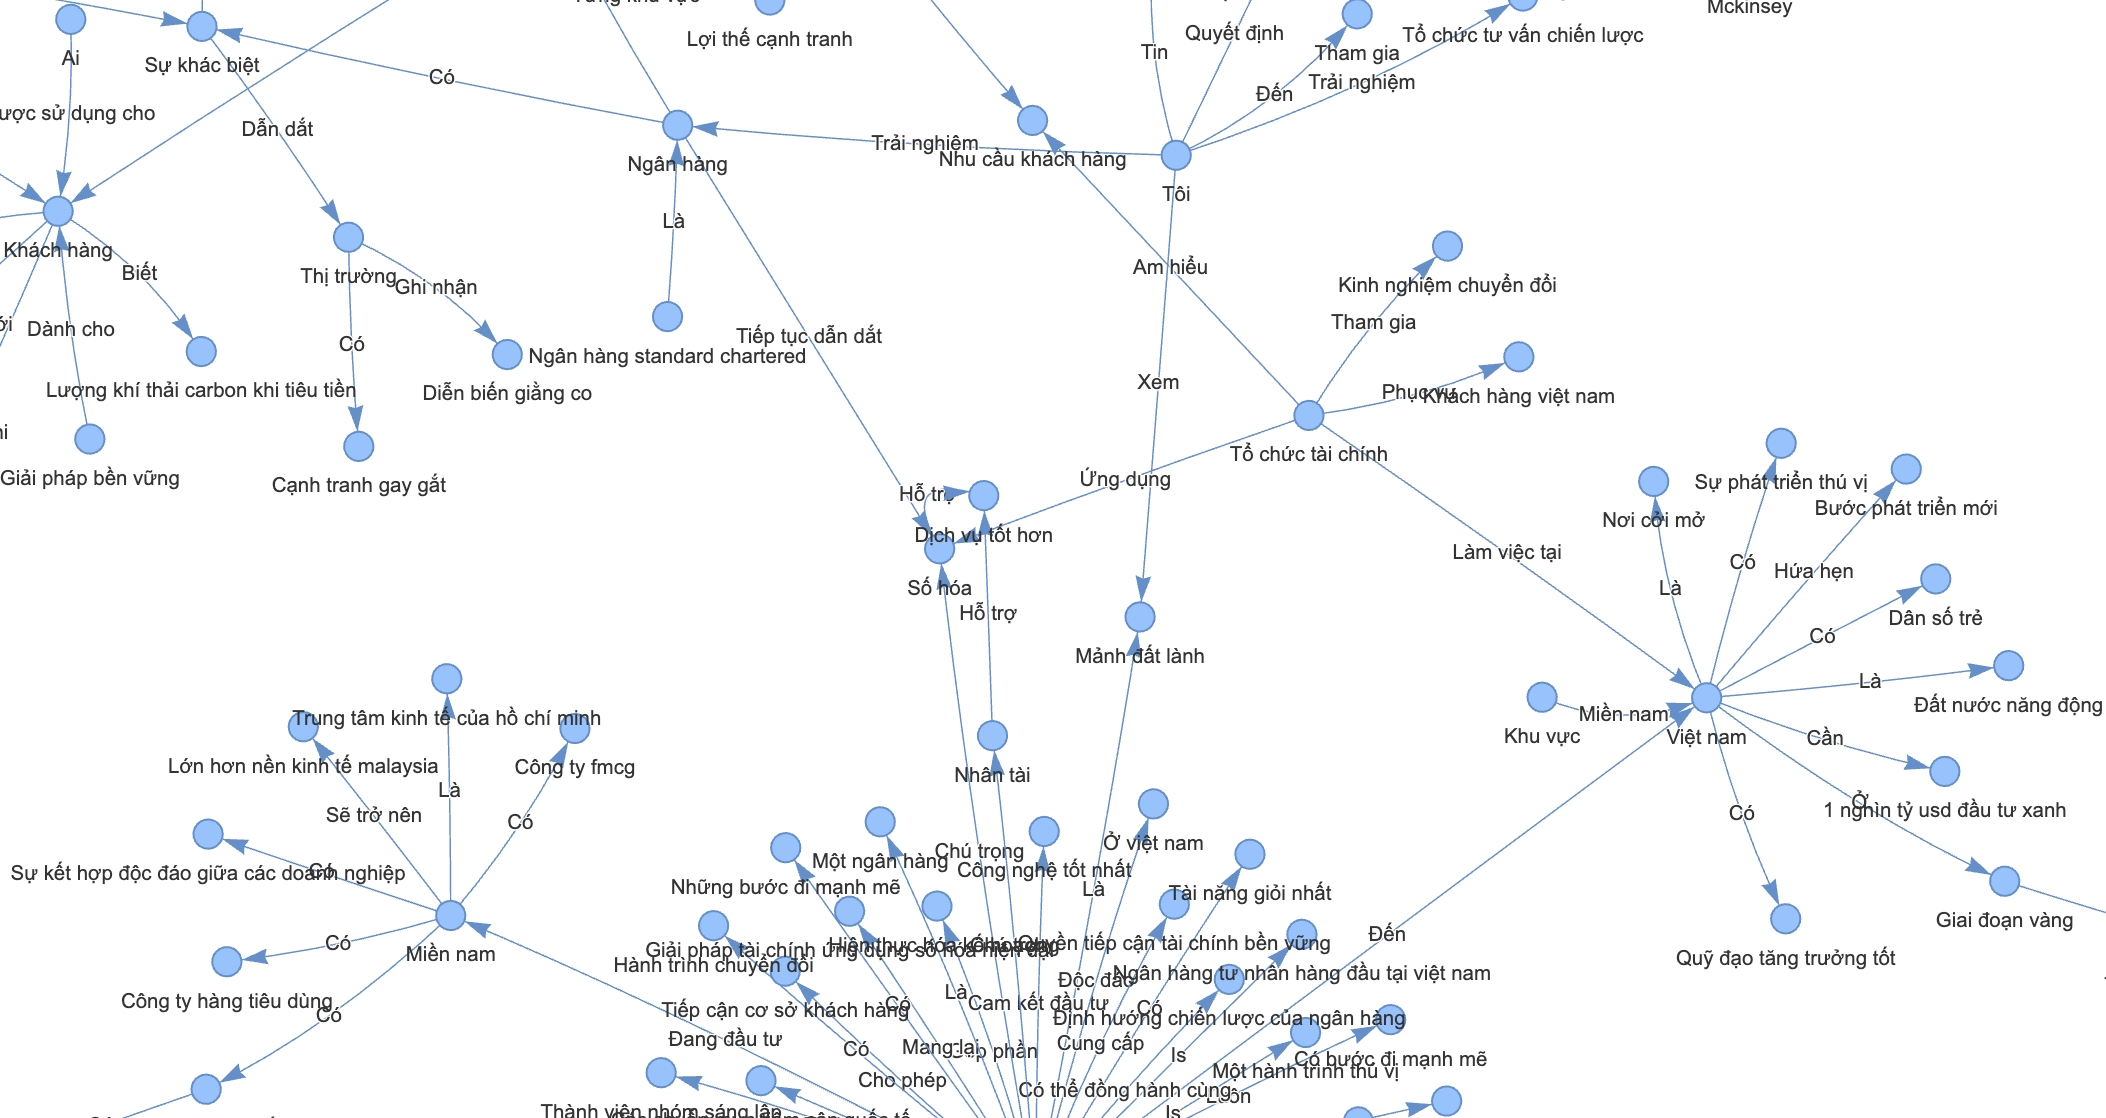

In [36]:
nodeSearch = simple_index.property_graph_store.get_triplets(
    entity_names=["Khu vực"]
)

print(nodeSearch)

[(EntityNode(label='entity', embedding=None, properties={'file_path': '/Users/ngocp/Documents/projects/finance-bot/research/../data/bao-chi/tcb.md', 'file_name': 'tcb.md', 'file_size': 18109, 'creation_date': '2024-10-19', 'last_modified_date': '2024-10-19', 'triplet_source_id': '6c4055f0-1cb2-44c4-a440-bdbe6dbc4d74'}, name='Khu vực'), Relation(label='Miền nam', source_id='Khu vực', target_id='Việt nam', properties={'file_path': '/Users/ngocp/Documents/projects/finance-bot/research/../data/bao-chi/tcb.md', 'file_name': 'tcb.md', 'file_size': 18109, 'creation_date': '2024-10-19', 'last_modified_date': '2024-10-19', 'triplet_source_id': '6c4055f0-1cb2-44c4-a440-bdbe6dbc4d74'}), EntityNode(label='entity', embedding=None, properties={'file_path': '/Users/ngocp/Documents/projects/finance-bot/research/../data/bao-chi/tcb.md', 'file_name': 'tcb.md', 'file_size': 18109, 'creation_date': '2024-10-19', 'last_modified_date': '2024-10-19', 'triplet_source_id': '6c4055f0-1cb2-44c4-a440-bdbe6dbc4d74

In [31]:
entity_names = simple_index.property_graph_store
print(entity_names)

In [44]:
# Step 1: Extract node properties
nodes = simple_index.property_graph_store.get()
# print('nodes:', nodes)
node_ids = [node.id for node in nodes]
print('node_ids:', node_ids)

# Step 2: Get the label from each node's properties
node_labels = [node.label for node in nodes]
print('node_labels:', node_labels)
# node_properties = [" ".join([str(v) for v in node.properties.values()]) for node in nodes]
# print('node_properties:', node_properties)

node_ids: ['338a2295-b576-4530-ad2d-cb0a858992f2', '92340c44-b891-442c-9203-543f1f061fc9', 'da269ebb-5445-4490-b990-0d1a41ef718b', '30d338e8-8aec-4d22-986a-ecbd53d446b3', 'b002ea4d-afb3-469a-82fb-1a6860343ad2', '86e31726-6e8b-4f76-b497-f4e4e6007a75', '3757fb0f-5a23-4bca-8233-7d625913cc32', '5a3e47b7-3c4f-4a18-9aa9-5b0d05f855a0', 'b69b8011-455e-4622-83b4-492298e967dc', '0ca01242-bc29-49a5-a9b7-c9c95af350db', '067cd745-4ee5-4785-82c9-527c6fa28c81', '01909073-038f-446e-99ac-0503766051a2', '47f94b95-bfca-4f2c-8c6b-8edae55c7443', '6c4055f0-1cb2-44c4-a440-bdbe6dbc4d74', 'e14aad0f-5314-4b82-9842-b25e93593e37', 'efcbc3dc-923e-4064-9895-eaafc114c373', 'c5649a41-4b52-4101-b42c-e1c10e6906fc', '3f3a6564-5b22-47d4-9885-fda3c566481b', 'c9853c11-f2d1-4722-b8ac-b2757a65894b', 'Bệnh viện của ông trầm bê', '45% lãi', 'Lợi nhuận', 'Bằng lần', 'Dap - vinachem', 'Doanh thu 761 tỷ đồng', '10% so với cùng kỳ năm trước', 'Chi phí bán hàng', 'Một nửa', 'Lợi nhuận của ddv', '183%', 'Lpbank', 'Lợi nhuận trước th

In [66]:
# use
retriever = simple_index.as_retriever(
    include_text=False,  # include source chunk with matching paths
    similarity_top_k=2,  # top k for vector kg node retrieval
)

question = "lãi sau thuế của công ty chứng khoán lpbank ?"
nodes = retriever.retrieve(question)
print("Retrieved nodes:")
for node in nodes:
    print(node.text)

print("Query engine:")
query_engine = simple_index.as_query_engine(
    include_text=False,  # include source chunk with matching paths
    similarity_top_k=2,  # top k for vector kg node retrieval
)
response = query_engine.query(question)
print("response:", response)


Retrieved nodes:
Lpbank -> Báo -> Lợi nhuận trước thuế quý 3
Lợi nhuận sau thuế -> Giảm -> 23% so với cùng kỳ năm ngoái
Lãi ròng -> Giảm -> 27% so với cùng kỳ 2023
Query engine:
response: Lãi sau thuế của công ty chứng khoán Lpbank đã giảm 23% so với cùng kỳ năm ngoái.


In [67]:
test_pairs = [
    ("lãi sau thuế của công ty chứng khoán lpbank ?", "Tăng 275% so với cùng kỳ năm trước"),
    ("thu gom cố phiếu MSN?", "Khối ngoại cũng giải ngân mua ròng 179 tỷ tại cổ phiếu MSN"),
]

for question, expected_answer in test_pairs:
    response = query_engine.query(question)
    print(f"Question: {question}")
    print(f"Expected Answer: {expected_answer}")
    print(f"Actual Answer: {response.response}")
    print()

Question: lãi sau thuế của công ty chứng khoán lpbank ?
Expected Answer: Tăng 275% so với cùng kỳ năm trước
Actual Answer: Lãi sau thuế của công ty chứng khoán Lpbank đã giảm 23% so với cùng kỳ năm ngoái.

Question: thu gom cố phiếu MSN?
Expected Answer: Khối ngoại cũng giải ngân mua ròng 179 tỷ tại cổ phiếu MSN
Actual Answer: Empty Response

